## Column Descriptions


> - ACTION:	ACTION is 1 if the resource was approved, 0 if the resource was not
- RESOURCE:	An ID for each resource
- MGR_ID :	The EMPLOYEE ID of the manager of the current EMPLOYEE ID record; an employee may have only one manager at a time
- ROLE_ROLLUP_1	:Company role grouping category id 1 (e.g. US Engineering)
- ROLE_ROLLUP_2	:Company role grouping category id 2 (e.g. US Retail)
- ROLE_DEPTNAME	:Company role department description (e.g. Retail)
- ROLE_TITLE:	Company role business title description (e.g. Senior Engineering Retail Manager)
- ROLE_FAMILY_DESC:	Company role family extended description (e.g. Retail Manager, Software Engineering)
- ROLE_FAMILY:	Company role family description (e.g. Retail Manager)
- ROLE_CODE : 	Company role code; this code is unique to each role (e.g. Manager)


##  ref :

- https://www.kaggle.com/c/amazon-employee-access-challenge/data
- http://www.chioka.in/kaggle-competition-solutions/

In [1]:
# Load basics library 

import pandas as pd, numpy as np
%matplotlib inline
%pylab inline
import seaborn  as sns 
import pylab as pl
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [2]:
# load CSVs

df_train = pd.read_csv('~/Kaggle.com_mini_project/Amazon_access/train.csv')
df_test = pd.read_csv('~/Kaggle.com_mini_project/Amazon_access/test.csv')
sampleSubmission = pd.read_csv('~/Kaggle.com_mini_project/Amazon_access/sampleSubmission.csv')

In [3]:
#df_test.head()

In [4]:
df_train.head(3)

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880


In [45]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, mean_absolute_error
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix

def sample_split(data):
    #data =  data[selected_feature]
    relevent_cols = list(data)
    data_=data.values.astype(float)             
    Y = data_[:,0]
    X = data_[:,1:]
    test_size = .3
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state = 3)
    return X_train, X_test, y_train, y_test


def reg_analysis(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    #Calculate Variance score
    Variance_score = explained_variance_score(y_test, prediction)
    print ('Variance score : %.2f' %Variance_score)
    #Mean Absolute Error
    MAE = mean_absolute_error(y_test, prediction)
    print ('Mean Absolute Error : %.2f' %MAE)
    #Root Mean Squared Error
    RMSE = mean_squared_error(y_test, prediction)**0.5
    print ('Mean Squared Error : %.2f' %RMSE)
    #R² score, the coefficient of determination
    r2s = r2_score(y_test, prediction)
    print ('R2  score : %.2f' %r2s)
    model_score = model.score(X_test,y_test)
    print ('model  score : %.2f' %model_score)
    # confusion metrix 
    y_test_predict = model.predict(X_test)
    print (confusion_matrix(y_test_predict,y_test))
    #return model

def learn_curve(model):
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    roc_auc = auc(fpr, tpr)
    print ('ROC AUC: %0.2f' % roc_auc)
    # plot curve 
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

In [6]:
df_train.head(2)

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539


In [7]:
X_train, X_test, y_train, y_test = sample_split(df_train)

## 1-1) Linear regression

In [41]:
# Linear model 

from sklearn import linear_model

model = linear_model.LinearRegression()
#print ('Linear Regression')
#reg_analysis(model,X_train, X_test, y_train, y_test)

## 1-2)  SVR

In [50]:
from sklearn import svm
clf_svr = svm.SVC()

#clf_svr.fit(X_train,y_train)
#clf_svr.predict(X_test)
#clf_svr.score(X_test,y_test)

reg_analysis(clf_svr,X_train, X_test, y_train, y_test)

Variance score : 0.00
Mean Absolute Error : 0.06
Mean Squared Error : 0.24
R2  score : -0.06
model  score : 0.94
[[   2    0]
 [ 576 9253]]


In [30]:
# ====  ROC curve  ====
#learn_curve(clf_svr)

## 1-3) Logistics regression 

In [39]:
from sklearn.linear_model import LogisticRegression

clf_logistics = LogisticRegression()
#clf_logistics.fit(X_train,y_train)
#clf_logistics.predict(X_test)
#clf_logistics.score(X_test,y_test)

reg_analysis(clf_logistics,X_train, X_test, y_train, y_test)

Variance score : 0.00
Mean Absolute Error : 0.06
Mean Squared Error : 0.24
R2  score : -0.06
[[   0    0]
 [ 578 9253]]


ROC AUC: 0.51


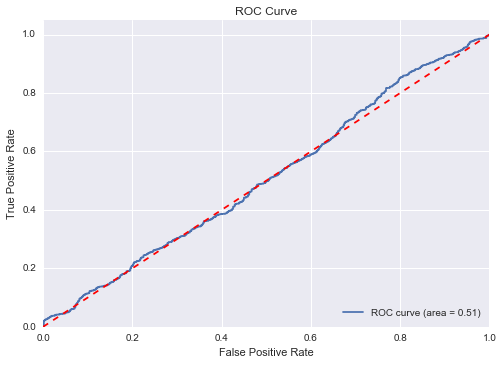

In [28]:
# ====  ROC curve  ====
learn_curve(clf_logistics)

## 1-4) decision tree

In [49]:
# Decision tree


from sklearn.tree import DecisionTreeClassifier

clf_tree = DecisionTreeClassifier(random_state=0)
#clf_tree.fit(X_train,y_train)
#clf_tree.predict(X_test)
#clf_tree.score(X_test,y_test)

reg_analysis(clf_tree,X_train, X_test, y_train, y_test)

Variance score : -0.39
Mean Absolute Error : 0.08
Mean Squared Error : 0.28
R2  score : -0.39
model  score : 0.92
[[ 223  403]
 [ 355 8850]]


ROC AUC: 0.67


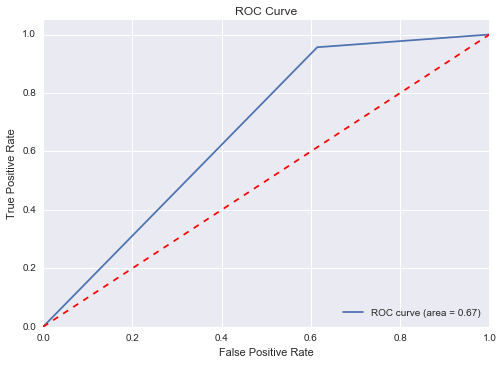

In [26]:
# ====  ROC curve  ====

learn_curve(clf_tree)

## 1-5) random forest 

In [48]:
# Random forest 

from sklearn.ensemble import RandomForestClassifier

clf_forest = RandomForestClassifier(random_state=0)
#clf_forest.fit(X_train,y_train)
#clf_forest.predict(X_test)
#clf_forest.score(X_test,y_test)
reg_analysis(clf_forest,X_train, X_test, y_train, y_test)


Variance score : -0.02
Mean Absolute Error : 0.06
Mean Squared Error : 0.24
R2  score : -0.03
model  score : 0.94
[[ 207  188]
 [ 371 9065]]


ROC AUC: 0.80


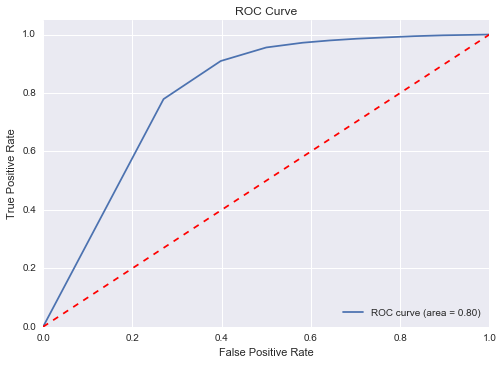

In [27]:
# ====  ROC curve  ====
learn_curve(clf_forest)

# 2) Evaluate performance  with "test data" set 

In [13]:
df_test.head(4)

,id,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,78766,72734,118079,118080,117878,117879,118177,19721,117880
1,2,40644,4378,117961,118327,118507,118863,122008,118398,118865
2,3,75443,2395,117961,118300,119488,118172,301534,249618,118175
3,4,43219,19986,117961,118225,118403,120773,136187,118960,120774


In [14]:
len(df_test)

58921

In [15]:
len(sampleSubmission)

58921

In [16]:
X_train_, X_test_, y_train_, y_test_ = sample_split(df_test)

In [17]:
df_predict=pd.DataFrame()

# submit prediction from TEST data 

###  clf_forest with 0.65 score
df_predict['Action'] = clf_forest.predict(df_test.iloc[:,1:])
df_predict.index.name = 'ID'
# make index feat submission form 
# https://www.kaggle.com/c/amazon-employee-access-challenge/submit
df_predict.index = df_predict.index + 1

In [18]:
df_predict.head(3)

,Action
ID,
1,1.0
2,1.0
3,1.0


In [31]:
print (df_predict.Action.value_counts())

1.0    56628
0.0     2293
Name: Action, dtype: int64


In [19]:
df_predict.to_csv('../Kaggle.com_mini_project/Amazon_access/df_predict.csv')